# Data set information
This is a loan prediction data set here applicant apply for the loan first and after that bank or financial firm analyse the 
customers application on various features and make a decision whether the loan should be approved or not

Variable            Description
Loan_ID  	        Unique Loan ID
Gender	            Male/ Female
Married	            Applicant married (Y/N)
Dependents	        Number of dependents
Education	        Applicant Education (Graduate/ Under Graduate)
Self_Employed	    Self employed (Y/N)
ApplicantIncome	    Applicant income
CoapplicantIncome   Coapplicant income
LoanAmount	        Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	    credit history meets guidelines
Property_Area	    Urban/ Semi Urban/ Rural
Loan_Status      	Loan approved (Y/N) 

                        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
loan_df=pd.read_csv("Loan Prediction Dataset.csv")

In [3]:
loan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("shape:",loan_df.shape)

shape: (614, 13)


In [5]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
import warnings
warnings.filterwarnings("ignore")

AxesSubplot(0.125,0.125;0.698618x0.755)


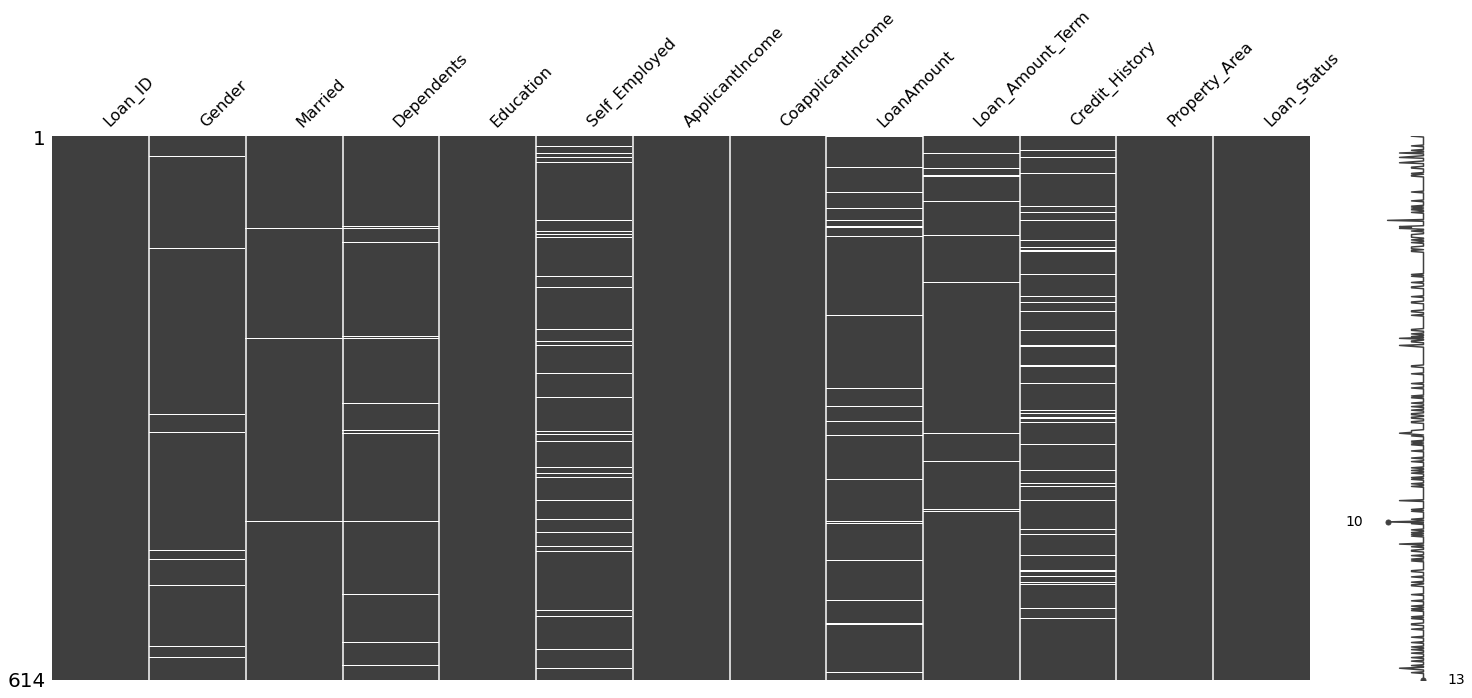

In [8]:
import missingno as mn
print(mn.matrix(loan_df))

In [9]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='LoanAmount'>

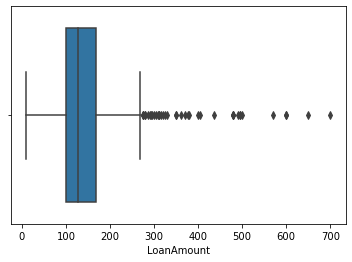

In [10]:
sns.boxplot(x="LoanAmount", data=loan_df)

In [11]:
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median())
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mean())
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])

In [12]:
loan_df['Gender'] = loan_df["Gender"].fillna(loan_df['Gender'].mode()[0])
loan_df['Married'] = loan_df["Married"].fillna(loan_df['Married'].mode()[0])
loan_df['Dependents'] = loan_df["Dependents"].fillna(loan_df['Dependents'].mode()[0])
loan_df['Self_Employed'] = loan_df["Self_Employed"].fillna(loan_df['Self_Employed'].mode()[0])

AxesSubplot(0.125,0.125;0.698618x0.755)


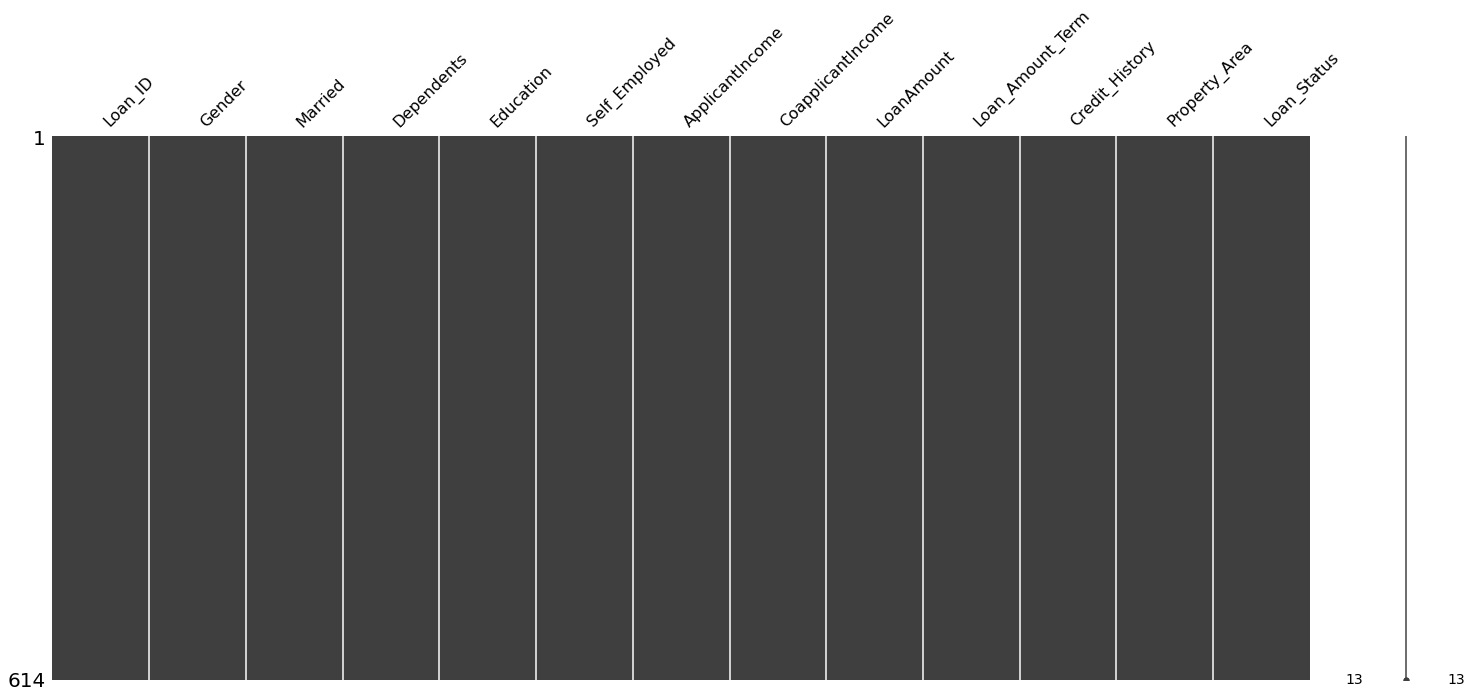

In [13]:
print(mn.matrix(loan_df))

In [14]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.855049
std,6109.041673,2926.248369,84.107233,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

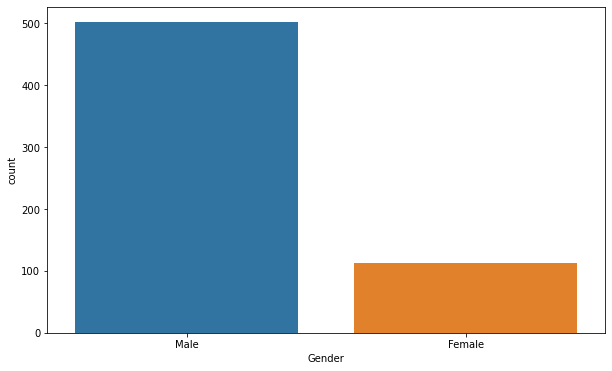

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(loan_df["Gender"])

<AxesSubplot:>

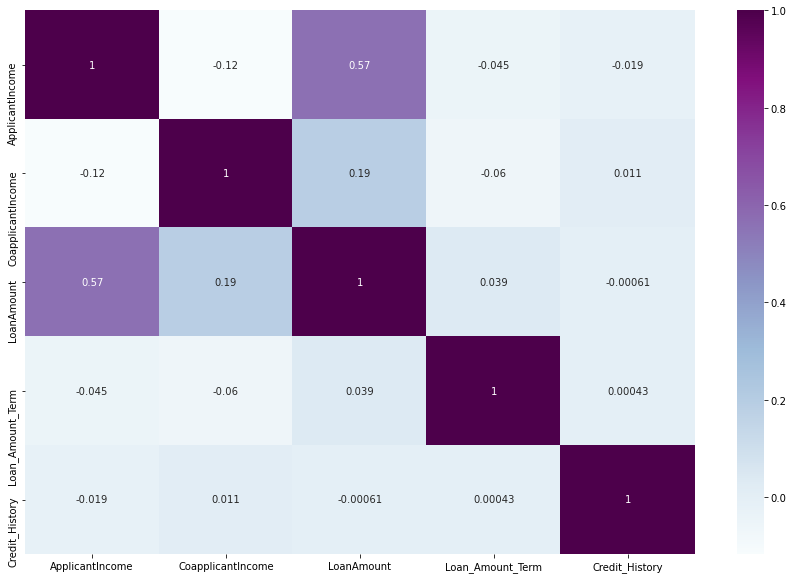

In [16]:
corr =loan_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [17]:
loan_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.000607
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.000607,0.000432,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

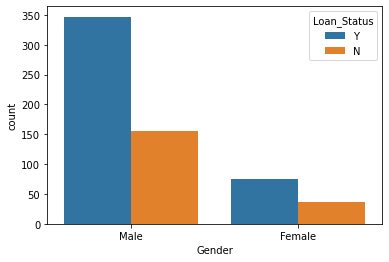

In [18]:
sns.countplot(x="Gender",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Married', ylabel='count'>

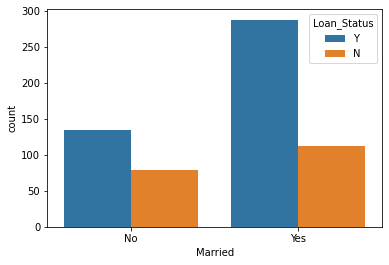

In [20]:
sns.countplot(x="Married",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

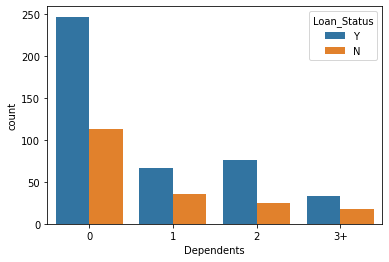

In [22]:
sns.countplot(x="Dependents",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Education', ylabel='count'>

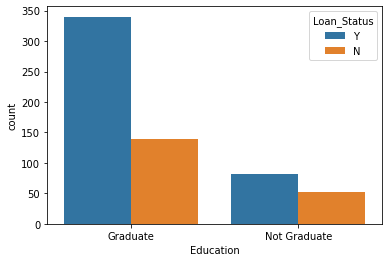

In [24]:
sns.countplot(x="Education",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

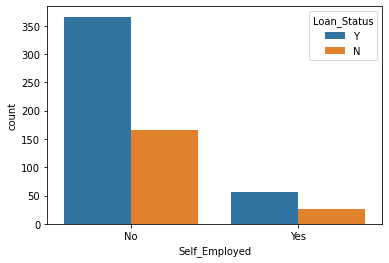

In [26]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=loan_df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

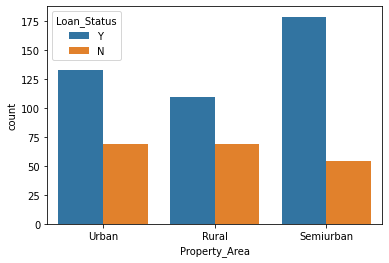

In [28]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=loan_df)

<AxesSubplot:>

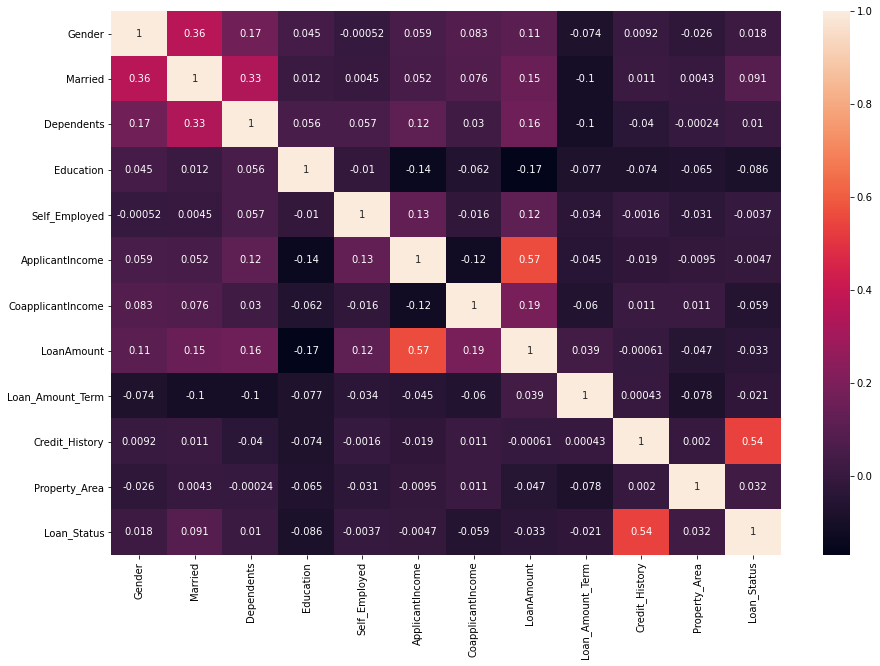

In [32]:
corr =loan_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

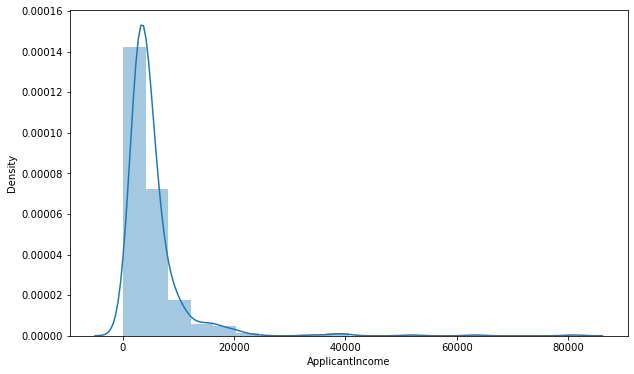

In [34]:
plt.figure(figsize=(10, 6))
sns.distplot(loan_df["ApplicantIncome"],bins=20)

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

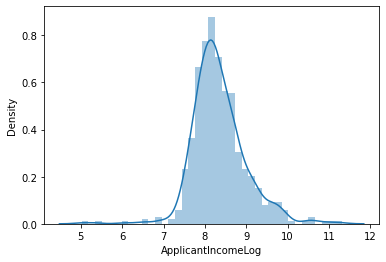

In [35]:
loan_df['ApplicantIncomeLog'] = np.log(loan_df['ApplicantIncome']+1)
sns.distplot(loan_df["ApplicantIncomeLog"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

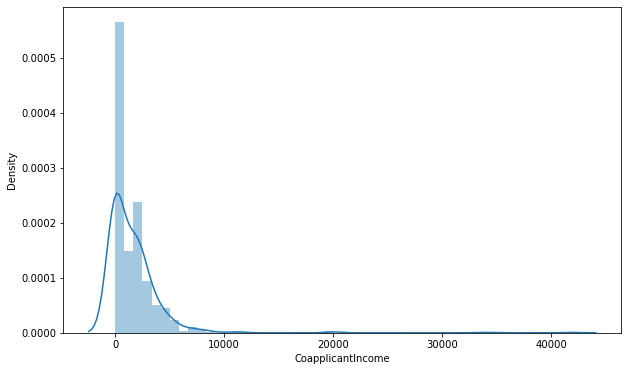

In [36]:
plt.figure(figsize=(10, 6))
sns.distplot(loan_df["CoapplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncomeLog', ylabel='Density'>

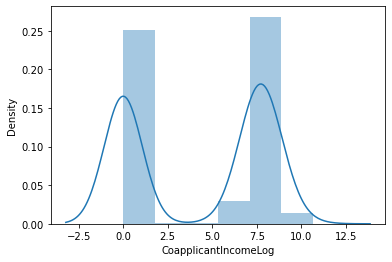

In [37]:
loan_df['CoapplicantIncomeLog'] = np.log(loan_df['CoapplicantIncome']+1)
sns.distplot(loan_df["CoapplicantIncomeLog"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

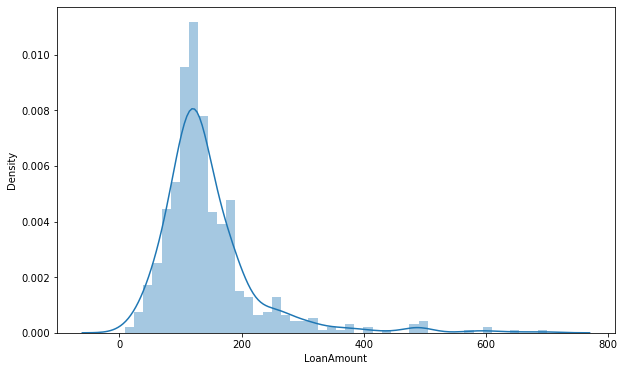

In [38]:
plt.figure(figsize=(10, 6))
sns.distplot(loan_df["LoanAmount"])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

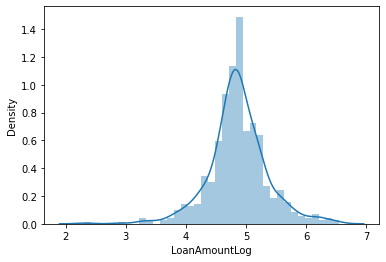

In [39]:
loan_df['LoanAmountLog'] = np.log(loan_df['LoanAmount']+1)
sns.distplot(loan_df["LoanAmountLog"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

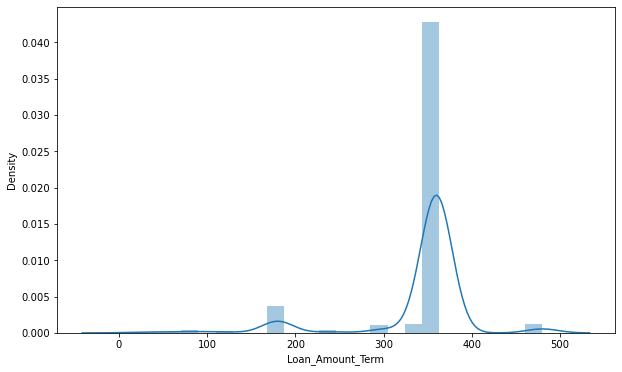

In [40]:
plt.figure(figsize=(10, 6))
sns.distplot(loan_df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

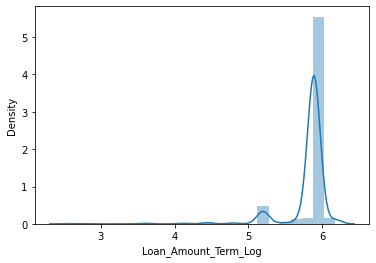

In [41]:
loan_df['Loan_Amount_Term_Log'] = np.log(loan_df['Loan_Amount_Term']+1)
sns.distplot(loan_df["Loan_Amount_Term_Log"])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

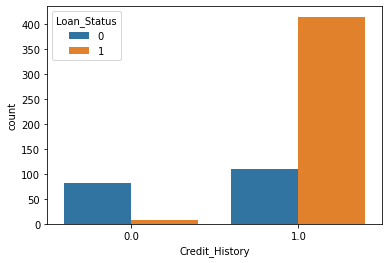

In [42]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=loan_df)

In [43]:
pd.crosstab(loan_df["Credit_History"],["Loan_status"],margins=True)

col_0,Loan_status,All
Credit_History,,
0.0,89,89
1.0,525,525
All,614,614


In [44]:
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']


In [45]:
loan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,8.674197,0.000000,4.859812,5.888878,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430327,7.319202,4.859812,5.888878,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,8.006701,0.000000,4.204693,5.888878,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,7.857094,7.765993,4.795791,5.888878,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,8.699681,0.000000,4.955827,5.888878,6000.0


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

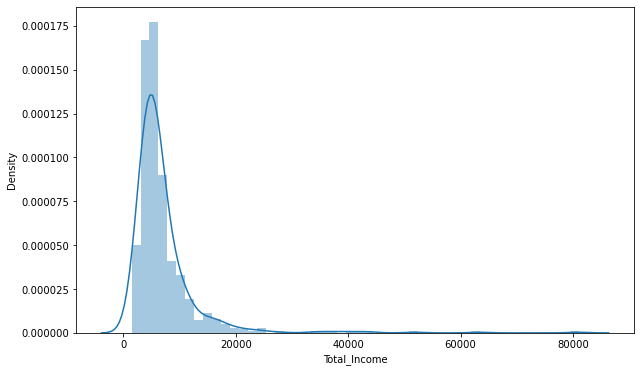

In [46]:
plt.figure(figsize=(10, 6))
sns.distplot(loan_df["Total_Income"])

<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

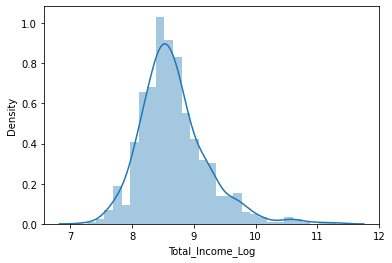

In [47]:
loan_df['Total_Income_Log'] = np.log(loan_df['Total_Income']+1)
sns.distplot(loan_df["Total_Income_Log"])

In [48]:
loan_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income,Total_Income_Log
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,8.674197,0.000000,4.859812,5.888878,5849.0,8.674197
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,8.430327,7.319202,4.859812,5.888878,6091.0,8.714732
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,8.006701,0.000000,4.204693,5.888878,3000.0,8.006701
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,7.857094,7.765993,4.795791,5.888878,4941.0,8.505525
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,8.699681,0.000000,4.955827,5.888878,6000.0,8.699681


In [49]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
loan_df = loan_df.drop(columns=cols, axis=1)
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


## correlation between diffrent variables

<AxesSubplot:>

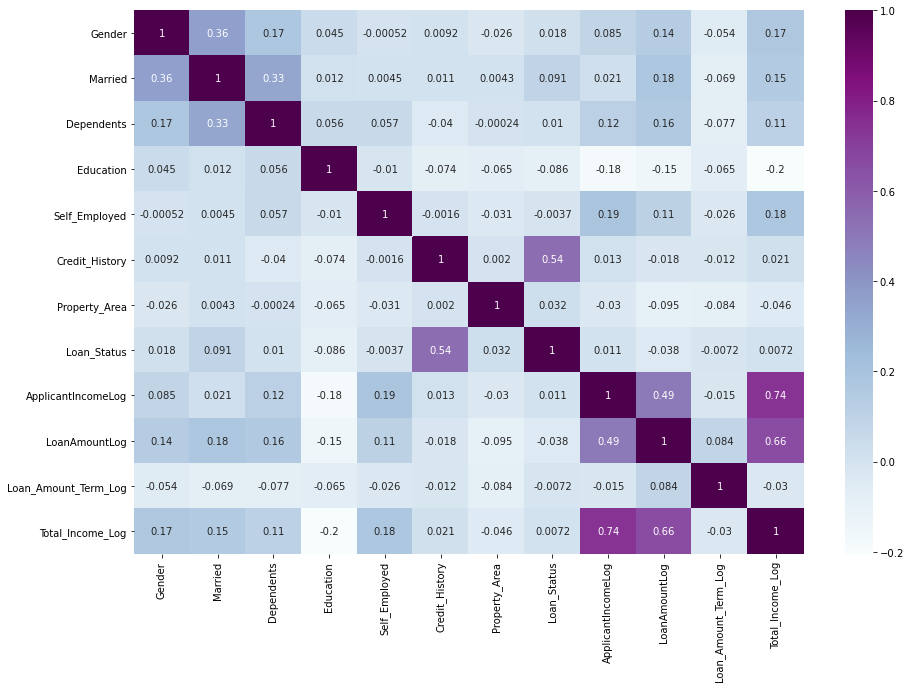

In [50]:
corr =loan_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [51]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loan_df[col] = le.fit_transform(loan_df[col])

In [52]:
loan_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


<AxesSubplot:>

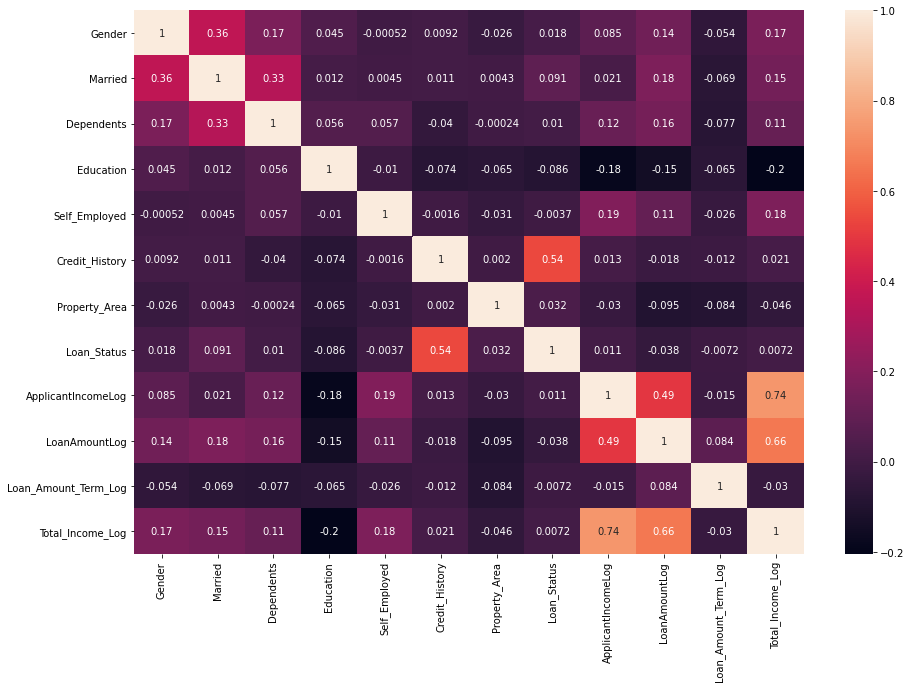

In [53]:
corr =loan_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

# TRAIN -TEST SPLIT

In [54]:
X = loan_df.drop(columns=['Loan_Status'], axis=1)
y = loan_df['Loan_Status']

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)